### Acknowledgement
Name: Zuha Aqib     
ERP ID: 26106    
Section: 10am Miss Solat     
Date: (written on) 08-Mar-25    

code has been taken from Miss Solat's code files and written by Zuha themselves. 

In [627]:
from datetime import datetime
print("Last time code executed:", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

Last time code executed: 2025-03-09 16:05:19


In [628]:
erp = 26106 
# will be referenced later on in the code when we use it for random_state
erp

26106

# Imports
here we import all the necessary libraries and modules

In [629]:
# to load the dataset
import warnings
warnings.filterwarnings('ignore')

# to make the file of wss, sil scores open immediately
import os

# to handle the data and perform numerical operations on it
import pandas as pd
import numpy as np

# to do natural language processing
import nltk

# preprocessing: to clean the data
import re

# preprocessing: stop words removal
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# preprocessing: words tokenization
from nltk.tokenize import word_tokenize

# preprocessing: stemmming and lemmatization
from nltk.stem import WordNetLemmatizer

# model running
from gensim.models import Word2Vec, Doc2Vec
from gensim.models.doc2vec import TaggedDocument

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# clustering: k means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to plot the graph
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import seaborn as sns

# Time Displayer
this code is a function that we will call at multiple instances of the code to see how long it took to run the code to see when it ran

In [630]:
# Function to get current date and time as a string
def get_current_datetime():
    return datetime.now().strftime("%Y-%m-%d %H:%M:%S")

# Load the Dataset
Here we load the dataset from a csv file and then save it into a variable

In [631]:
dummy_dataframe = pd.read_csv("dataset/news_Feb_14.csv")
dummy_dataframe = dummy_dataframe.iloc[:, 0]  # Select only the headline column
documents = dummy_dataframe.tolist()  # Convert to list
documents

['ECC endorses purchase of $582mn capital shares in BRICS’s New Development Bank',
 'Netanyahu’s statement to establish Palestinian state in Saudi Arabia irresponsible, provocative: FO',
 'India, US agree to resolve trade and tariff rows after Trump-Modi talks',
 'Aurangzeb discusses Pakistan’s structural reforms with IFC chief',
 'HBL, S&P Global launch Pakistan’s first manufacturing PMI',
 'KSE-100 closes 479 points lower as late-session selling erases intra-day gains',
 'PPL executes agreements for Sui Gas Field operations',
 'Hubco Green, PSO collaborate to setup EV charging infrastructure across Pakistan',
 'Rupee records marginal improvement against US dollar',
 'At least 9 dead, 7 injured in Balochistan’s Harnai blast',
 'Gold adds to record rally, reaches Rs306,200 per tola in Pakistan',
 'IMF’s 2024 Article IV report, and debate on inflation—I',
 'Pakistan CPI 2024 – deep-rooted corruption persists',
 '‘Like a wormhole’: Musk promises ‘Dubai Loop’ tunnel network',
 'Reforming 

In [632]:
original_headlines = documents.copy()

# Preprocessing
here we perform the preprocessing of data like:
- lowercase text
- stopword removal
- stemming or lemmatization
- n-grams

## Lowercase Conversion
here we convert our text to lowercase

In [633]:
documents = [document.lower() for document in documents]

print("Finished executing at:", get_current_datetime())
documents

Finished executing at: 2025-03-09 16:05:19


['ecc endorses purchase of $582mn capital shares in brics’s new development bank',
 'netanyahu’s statement to establish palestinian state in saudi arabia irresponsible, provocative: fo',
 'india, us agree to resolve trade and tariff rows after trump-modi talks',
 'aurangzeb discusses pakistan’s structural reforms with ifc chief',
 'hbl, s&p global launch pakistan’s first manufacturing pmi',
 'kse-100 closes 479 points lower as late-session selling erases intra-day gains',
 'ppl executes agreements for sui gas field operations',
 'hubco green, pso collaborate to setup ev charging infrastructure across pakistan',
 'rupee records marginal improvement against us dollar',
 'at least 9 dead, 7 injured in balochistan’s harnai blast',
 'gold adds to record rally, reaches rs306,200 per tola in pakistan',
 'imf’s 2024 article iv report, and debate on inflation—i',
 'pakistan cpi 2024 – deep-rooted corruption persists',
 '‘like a wormhole’: musk promises ‘dubai loop’ tunnel network',
 'reforming 

## Data Cleaning
here we clean the data

In [634]:
import re
import unicodedata

def clean_text(text):
    text = text.encode('ascii', 'ignore').decode()  # Remove non-ASCII characters
    text = unicodedata.normalize("NFKD", text)  # Normalize Unicode text
    
    # Separate numbers attached to words
    text = re.sub(r'(?<=\d)(?=[a-zA-Z])', ' ', text)  # number-word
    text = re.sub(r'(?<=[a-zA-Z])(?=\d)', ' ', text)  # word-number
    
    text = text.replace("-", " ") # replace hyphens with spaces to tokenize the numbers and words
    text = re.sub(r'[^\w\s,]', '', text)  # Remove everything except words, numbers, and commas
    text = re.sub(r'\s+', ' ', text).strip()   # remove extra spaces
    
    return text

In [635]:
documents = [clean_text(text) for text in documents]
documents

['ecc endorses purchase of 582 mn capital shares in bricss new development bank',
 'netanyahus statement to establish palestinian state in saudi arabia irresponsible, provocative fo',
 'india, us agree to resolve trade and tariff rows after trump modi talks',
 'aurangzeb discusses pakistans structural reforms with ifc chief',
 'hbl, sp global launch pakistans first manufacturing pmi',
 'kse 100 closes 479 points lower as late session selling erases intra day gains',
 'ppl executes agreements for sui gas field operations',
 'hubco green, pso collaborate to setup ev charging infrastructure across pakistan',
 'rupee records marginal improvement against us dollar',
 'at least 9 dead, 7 injured in balochistans harnai blast',
 'gold adds to record rally, reaches rs 306,200 per tola in pakistan',
 'imfs 2024 article iv report, and debate on inflationi',
 'pakistan cpi 2024 deep rooted corruption persists',
 'like a wormhole musk promises dubai loop tunnel network',
 'reforming pension funds i

## Stop Words Removal
here we remove stop words. we have three options of:
- either declaring all possible stop words and then iteratively checking each word in the document if its a stop word and then adding the non-stop words. 
```
sw = ["from","of","and", "on","for", "the","have","a","be","to","in","will","if","by","into","as"]
docs_list = []
for d in document: 
    d_nlp = nlp(d.lower())
    t_list = []
    for token in d_nlp:
        tok_lem = str(token.lemma_)
        if (tok_lem not in sw):
            t_list.append(tok_lem)
    str_ = ' '.join(t_list) 
    docs_list.append(str_)
docs_list
```
However this is not a good practice. 
- pulling stop words from ```ntlk``` library: 
```
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
documents_no_stopwords = [" ".join([word for word in doc.split() if word not in stop_words]) 
```
However after running this code it didnt not remove stop words thus i removed it
- intializing stop_words in ```CountVectorizer()``` however here we are not using it
- using the ```ENGLISH_STOP_WORDS``` in ```sklearn```
```
tokens = [word for word in tokens if word not in stopwords.words('english') and word not in ENGLISH_STOP_WORDS]  
```
Lets try it and see it how it goes.

In [636]:
# Tokenize each document
tokenized_docs = [word_tokenize(doc) for doc in documents] 

# Remove stop words
filtered_docs = [[word for word in doc if word not in stopwords.words('english') and word not in ENGLISH_STOP_WORDS] for doc in tokenized_docs]

# Convert back to sentences if needed
documents = [" ".join(doc) for doc in filtered_docs]

documents

['ecc endorses purchase 582 mn capital shares bricss new development bank',
 'netanyahus statement establish palestinian state saudi arabia irresponsible , provocative fo',
 'india , agree resolve trade tariff rows trump modi talks',
 'aurangzeb discusses pakistans structural reforms ifc chief',
 'hbl , sp global launch pakistans manufacturing pmi',
 'kse 100 closes 479 points lower late session selling erases intra day gains',
 'ppl executes agreements sui gas field operations',
 'hubco green , pso collaborate setup ev charging infrastructure pakistan',
 'rupee records marginal improvement dollar',
 '9 dead , 7 injured balochistans harnai blast',
 'gold adds record rally , reaches rs 306,200 tola pakistan',
 'imfs 2024 article iv report , debate inflationi',
 'pakistan cpi 2024 deep rooted corruption persists',
 'like wormhole musk promises dubai loop tunnel network',
 'reforming pension funds pakistan sustainable approach',
 'cjp afridi administers oath newly appointed sc judges',
 '

## Reduction
here we change words to a smaller common form instead of the 's. We do this using two ways:
- stemming
- lemmatization

here we perform lemmatization as in the previous assignment, lemmatization had worked much better

### Lemmatization
this also reduces words to their singular form and is said to be better as it only reduces to words in the dictionary. after our 48 trials in the previous assignment, lemmatization was much better.

In [637]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_doc(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

In [638]:
documents = [lemmatize_doc(doc) for doc in documents]
documents

['ecc endorses purchase 582 mn capital share bricss new development bank',
 'netanyahus statement establish palestinian state saudi arabia irresponsible , provocative fo',
 'india , agree resolve trade tariff row trump modi talk',
 'aurangzeb discusses pakistan structural reform ifc chief',
 'hbl , sp global launch pakistan manufacturing pmi',
 'kse 100 close 479 point lower late session selling erases intra day gain',
 'ppl executes agreement sui gas field operation',
 'hubco green , pso collaborate setup ev charging infrastructure pakistan',
 'rupee record marginal improvement dollar',
 '9 dead , 7 injured balochistans harnai blast',
 'gold add record rally , reach r 306,200 tola pakistan',
 'imf 2024 article iv report , debate inflationi',
 'pakistan cpi 2024 deep rooted corruption persists',
 'like wormhole musk promise dubai loop tunnel network',
 'reforming pension fund pakistan sustainable approach',
 'cjp afridi administers oath newly appointed sc judge',
 'solar panel import 8

## N-Grams
here we decide how we want the words to be tokenized, either they are
- unigram: singular
- bigram: pairs (doubular)

for this assignment, we will focus on unigrams.

In [639]:
# because we want unigrams, we DO NOT have to do anything and we will leave it the way it is

# Vectorization
here we convert the text to numerical format for the model to understand it. we have four ways to do it:
- word2Vec
- doc2vec

in this code we are exploring the first method

## Word2Vec
in word2vec we have two methods:
- cbow architecture (target is predicted by context)
- skipgram (target predicts context)

In [640]:
# for sg variable
# sg = 0 # CBOW
sg = 1 # Skip-Gram

if sg == 0:
    model_type = 'CBOW'
else:
    model_type = 'Skipgram'

print(f"sg={sg}, model={model_type}")

sg=1, model=Skipgram


### Variables to set
here we set variables like vector_size, window_size, count of epochs etc. we define them here so that in the code we dont have to change them. We can easily change them here and the code will change accordingly.

one thing to note here is that before starting the assignment i will make a list of each variable and what i want to test. then i will iterate over each variable keeping rest fixed, and write a loop to iterate over that variable and then i will select that as best. then for the next i will use its list but that previous one will be in its best. this will help me run as many things as i want in one code run.

In [641]:
# vector_sizes = [50, 100, 150, 200, 250, 300]
vector_sizes = [300, 325, 350, 400]
selected_vector_size = vector_sizes[0]

In [642]:
windows = [3, 5, 7, 10, 12, 15, 20]
# windows = [8, 9, 10, 11, 12]
selected_window = windows[0]

In [643]:
epochs = [50, 100, 150, 200, 250]
# epochs = [5, 10, 20, 30, 40, 50, 60]
selected_epoch = epochs[0]

### Code declaration
here we declare our code using the following syntax

In [644]:
def get_avg_word2vec(tokens, model, vector_size=300):
    vectors = [model.wv[word] for word in tokens if word in model.wv]  
    return np.mean(vectors, axis=0) if vectors else np.zeros(vector_size) 

In [645]:
def run_word2vec (docs, vector_size, window_size, epoch):
    word2vec_model = Word2Vec(
        sentences=docs,                        # Tokenized text
        vector_size=vector_size,           # Each word is represented by a x-dimensional vector
        window=window_size,                     # Context window size
        min_count=1,                                # Ignores words that appear less than 'min_count' times
        workers=4,                                  # Number of CPU cores used
        sg=sg,                   
        epochs=epoch                       # Number of training iterations
    )
    # print(word2vec_model)
    
    # Convert the list to a Pandas Series
    documents_series = pd.Series(docs)

    docs = documents_series.apply(lambda x: get_avg_word2vec(x, word2vec_model))    
    docs = np.array(docs.tolist())
    
    # print(docs)
    
    return docs

# K Means Clustering
here we cluster the documents into similar categories using k means clustering algorithm. we will be testing the algorithm for three values of k: 5, 9 and 13

In [646]:
def display_k_means(k, data):
    print(f"Displaying {k} start time:", get_current_datetime())
    
    svd = TruncatedSVD(n_components=2, random_state=42)
    data = svd.fit_transform(data)
    
    kmeans = KMeans(n_clusters=k, random_state=erp)
    labels = kmeans.fit_predict(data)
    
    # Convert to DataFrame for visualization
    df_viz = pd.DataFrame({'X': data[:, 0], 'Y': data[:, 1], 'Cluster': labels})

    # Scatter plot of clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_viz, x='X', y='Y', hue='Cluster', palette='tab10', s=100, edgecolor='black')
    plt.title("K-Means Clustering Visualization (2D Projection)")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend(title="Cluster")
    plt.show()
    
    print("Finished displaying at:", get_current_datetime(), "\n")

In [647]:
def run_k_means(k, data, results, vector_size, window, epoch):
    print(f"Executing {k} start time:", get_current_datetime())
    
    kmeans = KMeans(n_clusters=k, random_state=erp)
    labels = kmeans.fit_predict(data)
    
    wss = kmeans.inertia_  # Within-Cluster Sum of Squares
    silhouette_avg = silhouette_score(data, labels)  # Silhouette Score
    
    print(f"K={k}: Silhouette Score and WSS={silhouette_avg:.4f}\t{wss:.4f}")
    
    results.append([k, f'Word2Vec', vector_size, window, epoch, model_type, silhouette_avg, wss])
    
    # Create a DataFrame to store headlines with their assigned clusters
    df_clusters = pd.DataFrame({'Headline': original_headlines, 'Cluster': labels})

    # Display sample headlines per cluster
    for cluster in range(k):
        print(f"\nCluster {cluster}:")
        sample_headlines = df_clusters[df_clusters["Cluster"] == cluster].sample(n=min(5, len(df_clusters[df_clusters["Cluster"] == cluster])), random_state=erp)
        for idx, row in sample_headlines.iterrows():
            print(f"- {row['Headline']}")
    
    display_k_means(k, data)
    
    print("Finished executing at:", get_current_datetime(), "\n")
    
    return silhouette_avg, wss

## Code Running
here we run the code in a for-loop, because we have many variables we need to test with k-means. thus we test them here.

In [648]:
copy_of_docs = documents

In [649]:
window = selected_window
epoch = selected_epoch
# vector_size = selected_vector_size
# the variable that is commented means that is the variable being tested

In [650]:
# define a output that will save each case WSS and silhoutee so that it can be saved into a csv file later on
results = []

In [651]:
# define an output that will save each WSS with its k so that we can plot a scree plot later on
wss_scores = []

In [652]:
# define a variable that will save the best combination for reference at the end
best_combination = []
best_WSS = 100000000000000000000000000 # we want lowest wss so we start with large value
best_Sil = 0    # we want max sil so we start with small value

In [653]:
def run_combinations(k, best_combination, best_Sil, best_WSS):
    sum_wss = 0
    count_wss = 0

    for vector_size in vector_sizes:
        print("Executed at:", get_current_datetime(), "\n")
        documents = run_word2vec(copy_of_docs, vector_size, window, epoch)
        print(f"sg={sg}, Vector_Size={vector_size}, Window={window}, Epoch={epoch}")
        print("Finished displaying at:", get_current_datetime(), "\n")
        sil, wss = run_k_means(k, documents, results, vector_size, window, epoch)
        
        # sum the wss to find average for elbow plot
        sum_wss += wss
        count_wss += 1
        
        # compute max(sil, best_sil) and min(wss, best_wss) to find the BEST
        if sil > best_Sil and wss < best_WSS:
            best_combination = [k, "word", model_type, vector_size, window, epoch, sil, wss]
            best_WSS = wss
            best_Sil = sil
        else:
            # if best not found, pick if WSS is best however SIL is not best but it should be within 0.05 range
            sil_diff = best_Sil - sil
            wss_diff = best_WSS - wss
            if sil_diff >= 0 and sil_diff < 0.05 and wss_diff > 0:
                best_combination = [k, "word", model_type, vector_size, window, epoch, sil, wss]
                best_WSS = wss
                best_Sil = sil

    # once all combinations are tested, compute average and append that for elbow plots for that k
    avg_wss = sum_wss / count_wss
    wss_scores.append([k, avg_wss])
    
    return best_combination, best_Sil, best_WSS

2025-03-09 16:05:22,103 : INFO : collecting all words and their counts
2025-03-09 16:05:22,104 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 16:05:22,105 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 16:05:22,110 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 16:05:22,112 : INFO : Creating a fresh vocabulary
2025-03-09 16:05:22,113 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T16:05:22.113863', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 16:05:22,115 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Executed at: 2025-03-09 16:05:22 



2025-03-09 16:05:22,288 : INFO : EPOCH 4: training on 24723 raw words (4683 effective words) took 0.0s, 136197 effective words/s
2025-03-09 16:05:22,314 : INFO : EPOCH 5: training on 24723 raw words (4556 effective words) took 0.0s, 281502 effective words/s
2025-03-09 16:05:22,340 : INFO : EPOCH 6: training on 24723 raw words (4653 effective words) took 0.0s, 235420 effective words/s
2025-03-09 16:05:22,363 : INFO : EPOCH 7: training on 24723 raw words (4719 effective words) took 0.0s, 296154 effective words/s
2025-03-09 16:05:22,389 : INFO : EPOCH 8: training on 24723 raw words (4831 effective words) took 0.0s, 290515 effective words/s
2025-03-09 16:05:22,414 : INFO : EPOCH 9: training on 24723 raw words (4648 effective words) took 0.0s, 263140 effective words/s
2025-03-09 16:05:22,438 : INFO : EPOCH 10: training on 24723 raw words (4639 effective words) took 0.0s, 256039 effective words/s
2025-03-09 16:05:22,460 : INFO : EPOCH 11: training on 24723 raw words (4680 effective words) to

sg=1, Vector_Size=300, Window=3, Epoch=50
Finished displaying at: 2025-03-09 16:05:23 

Executing 5 start time: 2025-03-09 16:05:23
K=5: Silhouette Score and WSS=0.1068	2.0488

Cluster 0:
- Paramount and youtube clash over contract, channels may be dropped
- House Democrats urge Trump to retract comments on Gaza
- Fashion designer Mehmood Bhatti alleges assault by lawyers in Lahore court
- Justice Mansoor Ali Shah dismisses reference fears, highlights judiciary’s performance
- SALU, Spanish university sign MoU to boost archaeological studies

Cluster 1:
- Gold price soars by Rs2,500 per tola
- Pakistan CPI 2024 – deep-rooted corruption persists
- IMF’s 2024 Article IV report, and debate on inflation—I
- US regulator opens probe into 129,092 Honda vehicles over camera failure
- Second polio case of 2025 reported from Badin

Cluster 2:
- Cabinet approves civil servants’ asset declaration law under IMF reform agenda
- Hubco expands into EV charging sector with new subsidiary, partners wit

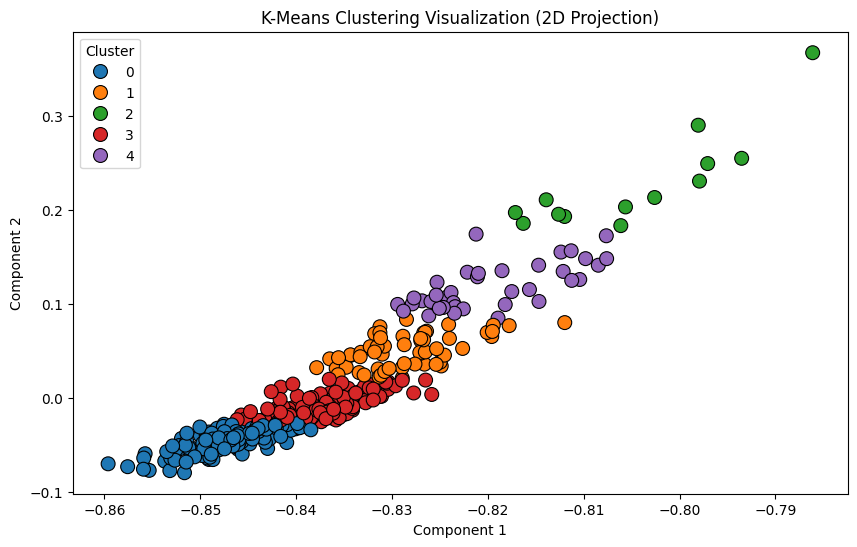

2025-03-09 16:05:23,412 : INFO : collecting all words and their counts
2025-03-09 16:05:23,413 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 16:05:23,413 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 16:05:23,416 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 16:05:23,417 : INFO : Creating a fresh vocabulary
2025-03-09 16:05:23,418 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T16:05:23.418865', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 16:05:23,420 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 16:05:23 

Finished executing at: 2025-03-09 16:05:23 

Executed at: 2025-03-09 16:05:23 



2025-03-09 16:05:23,598 : INFO : EPOCH 9: training on 24723 raw words (4769 effective words) took 0.0s, 454030 effective words/s
2025-03-09 16:05:23,618 : INFO : EPOCH 10: training on 24723 raw words (4566 effective words) took 0.0s, 333938 effective words/s
2025-03-09 16:05:23,635 : INFO : EPOCH 11: training on 24723 raw words (4646 effective words) took 0.0s, 443528 effective words/s
2025-03-09 16:05:23,652 : INFO : EPOCH 12: training on 24723 raw words (4614 effective words) took 0.0s, 362753 effective words/s
2025-03-09 16:05:23,667 : INFO : EPOCH 13: training on 24723 raw words (4661 effective words) took 0.0s, 432772 effective words/s
2025-03-09 16:05:23,682 : INFO : EPOCH 14: training on 24723 raw words (4790 effective words) took 0.0s, 430399 effective words/s
2025-03-09 16:05:23,697 : INFO : EPOCH 15: training on 24723 raw words (4726 effective words) took 0.0s, 439056 effective words/s
2025-03-09 16:05:23,716 : INFO : EPOCH 16: training on 24723 raw words (4774 effective word

sg=1, Vector_Size=325, Window=3, Epoch=50
Finished displaying at: 2025-03-09 16:05:24 

Executing 5 start time: 2025-03-09 16:05:24
K=5: Silhouette Score and WSS=0.1110	2.0297

Cluster 0:
- Saudi Arabia to host Arab summit on Trump’s Gaza plan
- Azaan Sami Khan pens birthday note for daughter
- Emirati ambassador to Washington says ‘no alternative’ to Trump's Gaza plan
- Ahmed Ali Akbar and Maham Batool Kickstart Their Wedding with a Qawwali Night
- Sabrina Carpenter's 'Bad Reviews' lyrics spark rumors about Barry Keoghan after clues in album

Cluster 1:
- Pakistan, Turkiye sign multiple agreements to boost bilateral relations
- Still Angry at Your Ex? The San Antonio Zoo Will Name a Cockroach After Them & Feed it To Animals
- DeepSeek dilemma: Why is the Chinese AI app facing global backlash?
- Fashion designer Mehmood Bhatti alleges assault by lawyers in Lahore court
- New Zealand provide update on Rachin Ravindra's injury ahead of tri-series final

Cluster 2:
- Wasim Akram joins Mee

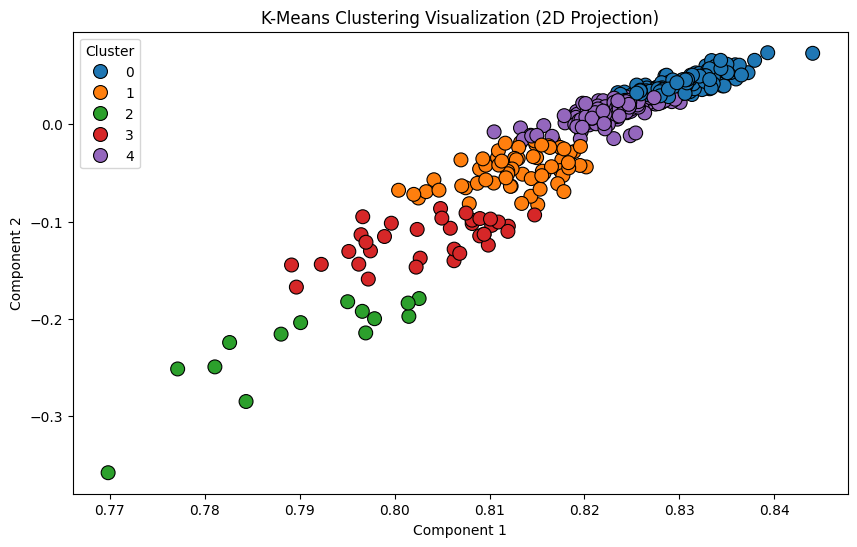

2025-03-09 16:05:24,626 : INFO : collecting all words and their counts
2025-03-09 16:05:24,627 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 16:05:24,628 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 16:05:24,635 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 16:05:24,637 : INFO : Creating a fresh vocabulary
2025-03-09 16:05:24,639 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T16:05:24.638646', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 16:05:24,639 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 16:05:24 

Finished executing at: 2025-03-09 16:05:24 

Executed at: 2025-03-09 16:05:24 



2025-03-09 16:05:24,835 : INFO : EPOCH 1: training on 24723 raw words (4688 effective words) took 0.0s, 197155 effective words/s
2025-03-09 16:05:24,877 : INFO : EPOCH 2: training on 24723 raw words (4643 effective words) took 0.0s, 158823 effective words/s
2025-03-09 16:05:24,905 : INFO : EPOCH 3: training on 24723 raw words (4671 effective words) took 0.0s, 371130 effective words/s
2025-03-09 16:05:24,920 : INFO : EPOCH 4: training on 24723 raw words (4603 effective words) took 0.0s, 393335 effective words/s
2025-03-09 16:05:24,936 : INFO : EPOCH 5: training on 24723 raw words (4722 effective words) took 0.0s, 412434 effective words/s
2025-03-09 16:05:24,952 : INFO : EPOCH 6: training on 24723 raw words (4724 effective words) took 0.0s, 369744 effective words/s
2025-03-09 16:05:24,968 : INFO : EPOCH 7: training on 24723 raw words (4658 effective words) took 0.0s, 391248 effective words/s
2025-03-09 16:05:24,984 : INFO : EPOCH 8: training on 24723 raw words (4685 effective words) took

sg=1, Vector_Size=350, Window=3, Epoch=50
Finished displaying at: 2025-03-09 16:05:25 

Executing 5 start time: 2025-03-09 16:05:25
K=5: Silhouette Score and WSS=0.1300	1.9104

Cluster 0:
- Sabalenka, Gauff dumped out of Qatar Open
- Kubra Khan and Gohar Rasheed are officially married!
- 'Cobra Kai' stars Tanner Buchanan and Mary Mouser confirm relationship, spark engagement rumours
- Babar Azam breaks Virat Kohli's another record
- Sher Afzal Marwat's 'Mujhe kyun nikala?' question sparks laughter in NA

Cluster 1:
- Exploring love through the rhythm and blues of K-pop
- Economist Stiglitz urges tariffs on Trump’s ‘dysfunctional’ admin
- Committee formed to prepare annual report on environmental protection
- PM Modi Meets Elon Musk in Washington, Discusses Tech Ties Amid Trump Tariff Threats
- FBR confident of raising tax-to-GDP ratio despite shortfall

Cluster 2:
- Gold price soars by Rs2,500 per tola
- Pakistan CPI 2024 – deep-rooted corruption persists
- IMF’s 2024 Article IV report

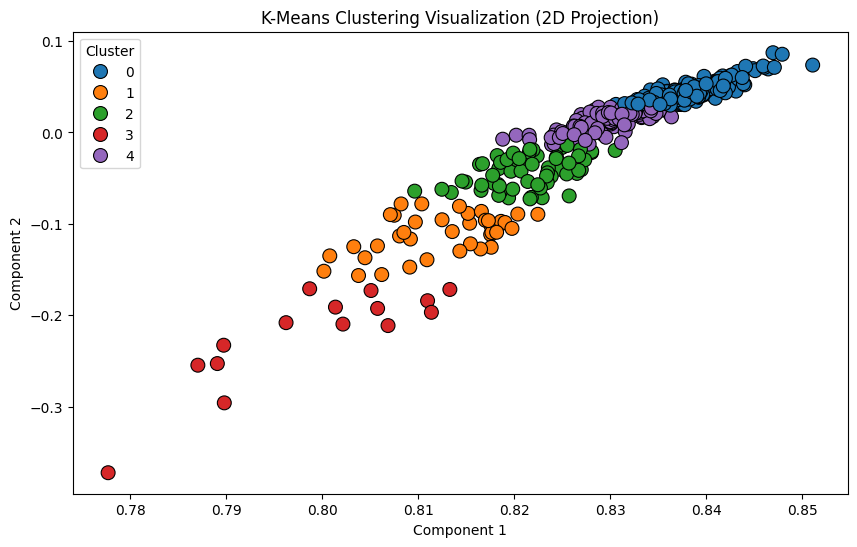

2025-03-09 16:05:26,076 : INFO : collecting all words and their counts
2025-03-09 16:05:26,077 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 16:05:26,078 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 16:05:26,081 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 16:05:26,082 : INFO : Creating a fresh vocabulary
2025-03-09 16:05:26,083 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T16:05:26.083026', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 16:05:26,085 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 16:05:26 

Finished executing at: 2025-03-09 16:05:26 

Executed at: 2025-03-09 16:05:26 



2025-03-09 16:05:26,283 : INFO : EPOCH 10: training on 24723 raw words (4668 effective words) took 0.0s, 388450 effective words/s
2025-03-09 16:05:26,299 : INFO : EPOCH 11: training on 24723 raw words (4711 effective words) took 0.0s, 524552 effective words/s
2025-03-09 16:05:26,313 : INFO : EPOCH 12: training on 24723 raw words (4574 effective words) took 0.0s, 426349 effective words/s
2025-03-09 16:05:26,332 : INFO : EPOCH 13: training on 24723 raw words (4604 effective words) took 0.0s, 353328 effective words/s
2025-03-09 16:05:26,354 : INFO : EPOCH 14: training on 24723 raw words (4691 effective words) took 0.0s, 430134 effective words/s
2025-03-09 16:05:26,375 : INFO : EPOCH 15: training on 24723 raw words (4648 effective words) took 0.0s, 436256 effective words/s
2025-03-09 16:05:26,392 : INFO : EPOCH 16: training on 24723 raw words (4627 effective words) took 0.0s, 338833 effective words/s
2025-03-09 16:05:26,417 : INFO : EPOCH 17: training on 24723 raw words (4662 effective wor

sg=1, Vector_Size=400, Window=3, Epoch=50
Finished displaying at: 2025-03-09 16:05:27 

Executing 5 start time: 2025-03-09 16:05:27
K=5: Silhouette Score and WSS=0.1028	1.8748

Cluster 0:
- South African rand firms after Trump’s tariff move; local budget next week
- Everyone can’t go to jail to meet Imran: IHC CJ
- Lawyer admits PTI’s decision to support military courts was wrong
- Pakistan Software Export Board expands IT infrastructure with 43 technology parks
- Power of AI brings Urdu books to life

Cluster 1:
- Andy Cohen’s alleged leaked nudes spark debate online
- Ty Dolla $ign cuts ties with Kanye West, deletes Instagram posts over Antisemitic controversy
- Senate body vows to continue probing solar panel import scandal
- From Napa to Rada: Actor Hani Taha’s journey to the world’s premier drama school
- Ranked: The Best Men in Romance Movies That'll Make You Believe in Love Again

Cluster 2:
- Tri-series final: Pakistan set 243-run target for New Zealand
- Petrol Price in Pakist

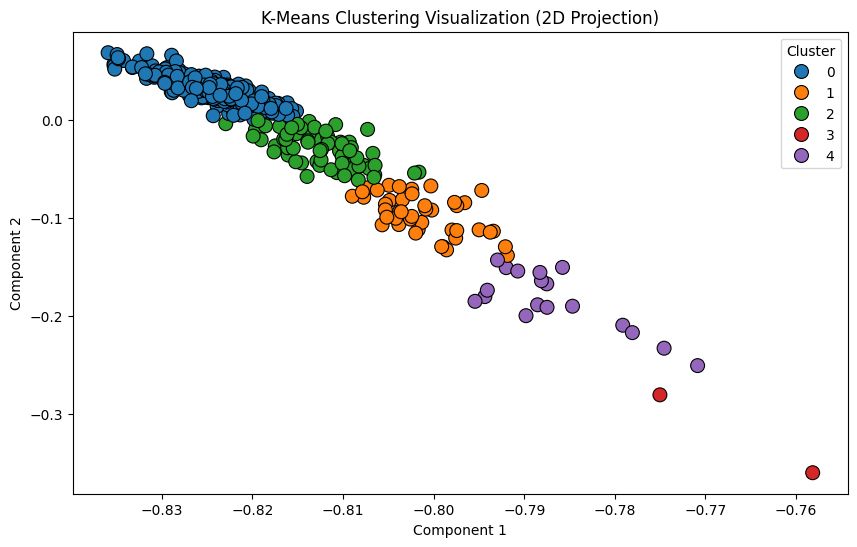

Finished displaying at: 2025-03-09 16:05:27 

Finished executing at: 2025-03-09 16:05:27 



In [654]:
best_combination, best_Sil, best_WSS = run_combinations(5, best_combination, best_Sil, best_WSS)

2025-03-09 16:05:27,436 : INFO : collecting all words and their counts
2025-03-09 16:05:27,440 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 16:05:27,443 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 16:05:27,452 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 16:05:27,454 : INFO : Creating a fresh vocabulary
2025-03-09 16:05:27,459 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T16:05:27.459206', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 16:05:27,461 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Executed at: 2025-03-09 16:05:27 



2025-03-09 16:05:27,636 : INFO : EPOCH 4: training on 24723 raw words (4731 effective words) took 0.0s, 203373 effective words/s
2025-03-09 16:05:27,663 : INFO : EPOCH 5: training on 24723 raw words (4583 effective words) took 0.0s, 239974 effective words/s
2025-03-09 16:05:27,689 : INFO : EPOCH 6: training on 24723 raw words (4729 effective words) took 0.0s, 305795 effective words/s
2025-03-09 16:05:27,711 : INFO : EPOCH 7: training on 24723 raw words (4688 effective words) took 0.0s, 291542 effective words/s
2025-03-09 16:05:27,734 : INFO : EPOCH 8: training on 24723 raw words (4759 effective words) took 0.0s, 278762 effective words/s
2025-03-09 16:05:27,755 : INFO : EPOCH 9: training on 24723 raw words (4555 effective words) took 0.0s, 293394 effective words/s
2025-03-09 16:05:27,779 : INFO : EPOCH 10: training on 24723 raw words (4737 effective words) took 0.0s, 285515 effective words/s
2025-03-09 16:05:27,801 : INFO : EPOCH 11: training on 24723 raw words (4631 effective words) to

sg=1, Vector_Size=300, Window=3, Epoch=50
Finished displaying at: 2025-03-09 16:05:28 

Executing 9 start time: 2025-03-09 16:05:28
K=9: Silhouette Score and WSS=0.1116	1.6991

Cluster 0:
- Aurangzeb highlights increasing risks facing insurance industry
- Australia’s Johnson sees chance to shine while ‘Big Three’ quicks away
- KU VC Prof Dr Khalid Iraqi inaugurates second agricultural festival
- Credits against tax WH: FBR issuing notices to salaried individuals: KTBA
- AJK interior minister claims India behind smuggling, IED incidents along LoC

Cluster 1:
- Harassment experiences in Pakistan: the need to speak up
- PIA upbeat about resumption of UK flights
- PM Shehbaz invites Turkish businessmen to invest in Pakistan’s diverse fields
- Mariyam Nafees’ husband’s past marriage surprises fan
- Deepika Padukone talks exam stress, mental health

Cluster 2:
- Pakistan’s 2nd polio case of 2025 reported in Badin
- Israeli military killed 85 journalists in 2024: CPJ
- Feb 14 last date to sub

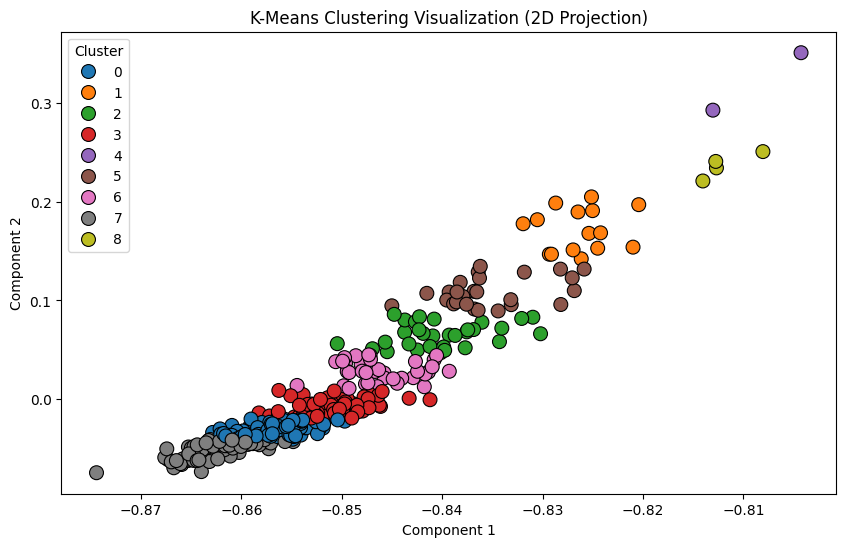

2025-03-09 16:05:29,403 : INFO : collecting all words and their counts
2025-03-09 16:05:29,404 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 16:05:29,406 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 16:05:29,411 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 16:05:29,412 : INFO : Creating a fresh vocabulary
2025-03-09 16:05:29,413 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T16:05:29.413442', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 16:05:29,415 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 16:05:29 

Finished executing at: 2025-03-09 16:05:29 

Executed at: 2025-03-09 16:05:29 



2025-03-09 16:05:29,667 : INFO : EPOCH 6: training on 24723 raw words (4639 effective words) took 0.1s, 71731 effective words/s
2025-03-09 16:05:29,710 : INFO : EPOCH 7: training on 24723 raw words (4635 effective words) took 0.0s, 156553 effective words/s
2025-03-09 16:05:29,750 : INFO : EPOCH 8: training on 24723 raw words (4693 effective words) took 0.0s, 173050 effective words/s
2025-03-09 16:05:29,786 : INFO : EPOCH 9: training on 24723 raw words (4636 effective words) took 0.0s, 179944 effective words/s
2025-03-09 16:05:29,828 : INFO : EPOCH 10: training on 24723 raw words (4689 effective words) took 0.0s, 171573 effective words/s
2025-03-09 16:05:29,859 : INFO : EPOCH 11: training on 24723 raw words (4730 effective words) took 0.0s, 207461 effective words/s
2025-03-09 16:05:29,888 : INFO : EPOCH 12: training on 24723 raw words (4711 effective words) took 0.0s, 196189 effective words/s
2025-03-09 16:05:29,927 : INFO : EPOCH 13: training on 24723 raw words (4715 effective words) t

sg=1, Vector_Size=325, Window=3, Epoch=50
Finished displaying at: 2025-03-09 16:05:30 

Executing 9 start time: 2025-03-09 16:05:30
K=9: Silhouette Score and WSS=0.0940	1.7400

Cluster 0:
- Aurangzeb highlights increasing risks facing insurance industry
- IK urges army chief to revisit policies in ‘best national interest’
- Marwat reaffirms unwavering loyalty to Imran Khan
- Karachi police unveil traffic and parking plan for tri-series, Champions Trophy
- Kuwait hosts high-level forum to discuss International Islamic Court of Justice

Cluster 1:
- Page Analyses and Comments LHR Page 2
- Sri Lanka shares end higher; central bank sees inflation peak above target in Q2 next year
- IGP pays tributes to police martyrs of Faisal Chowk Mall Road tragedy
- PMDC, Kazakh govt vow to cooperate in medical education
- Man gets four-year term in narcotics case

Cluster 2:
- UAE is offering 10-Year Visa; Guide for Pakistanis to apply in 2025
- Islamabad’s Zones 2, 4, and 5: CDA forms joint body to ov

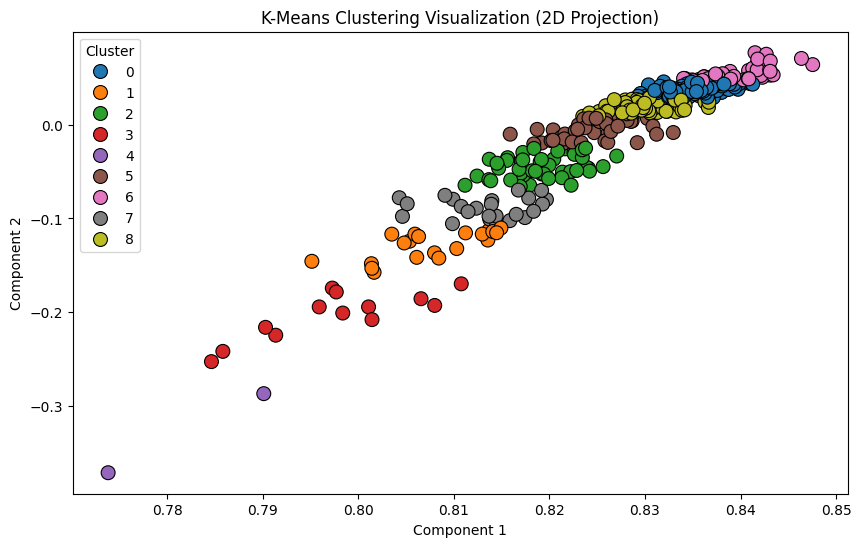

2025-03-09 16:05:31,285 : INFO : collecting all words and their counts
2025-03-09 16:05:31,286 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 16:05:31,287 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 16:05:31,292 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 16:05:31,294 : INFO : Creating a fresh vocabulary
2025-03-09 16:05:31,295 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T16:05:31.295438', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 16:05:31,295 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 16:05:31 

Finished executing at: 2025-03-09 16:05:31 

Executed at: 2025-03-09 16:05:31 



2025-03-09 16:05:31,520 : INFO : EPOCH 6: training on 24723 raw words (4662 effective words) took 0.0s, 94923 effective words/s
2025-03-09 16:05:31,591 : INFO : EPOCH 7: training on 24723 raw words (4724 effective words) took 0.1s, 85752 effective words/s
2025-03-09 16:05:31,657 : INFO : EPOCH 8: training on 24723 raw words (4663 effective words) took 0.1s, 91098 effective words/s
2025-03-09 16:05:31,710 : INFO : EPOCH 9: training on 24723 raw words (4667 effective words) took 0.0s, 109048 effective words/s
2025-03-09 16:05:31,780 : INFO : EPOCH 10: training on 24723 raw words (4665 effective words) took 0.1s, 92780 effective words/s
2025-03-09 16:05:31,849 : INFO : EPOCH 11: training on 24723 raw words (4715 effective words) took 0.1s, 87096 effective words/s
2025-03-09 16:05:31,922 : INFO : EPOCH 12: training on 24723 raw words (4710 effective words) took 0.0s, 99281 effective words/s
2025-03-09 16:05:31,991 : INFO : EPOCH 13: training on 24723 raw words (4756 effective words) took 0

sg=1, Vector_Size=350, Window=3, Epoch=50
Finished displaying at: 2025-03-09 16:05:34 

Executing 9 start time: 2025-03-09 16:05:34
K=9: Silhouette Score and WSS=0.0829	1.7103

Cluster 0:
- Shab-e-Barat being observed with religious fervour across country
- In a first, new SC judges to take oath outdoors
- 28 injured in car ramming attack in Munich
- Former SC judge Sheikh Azmat Saeed’s funeral to be held today
- Justice Sarfraz Dogar takes oath as acting Chief Justice of IHC

Cluster 1:
- Mehwish Hayat is All Set to Return to Our Television Screens After 7 Years!
- CJP Afridi administers oath to newly-appointed SC judges
- Conspiracy theorist Gabbard confirmed as new US spy chief
- DOGE subcommittee uncovers $2.7 trillion in improper Medicare, Medicaid payments
- Iran says it will rebuild nuclear facilities if attacked following reports of planned Israeli strike

Cluster 2:
- Railways to restore Shah Hussain Express from 25th
- More than 500 million take ‘holy dip’ in India’s Maha Kum

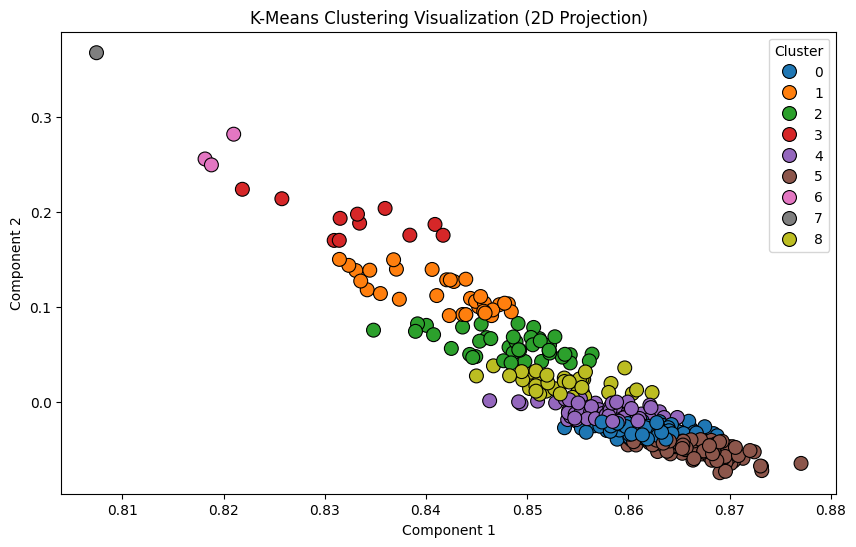

2025-03-09 16:05:35,834 : INFO : collecting all words and their counts
2025-03-09 16:05:35,838 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 16:05:35,841 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 16:05:35,855 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 16:05:35,859 : INFO : Creating a fresh vocabulary
2025-03-09 16:05:35,865 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T16:05:35.865445', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 16:05:35,870 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 16:05:35 

Finished executing at: 2025-03-09 16:05:35 

Executed at: 2025-03-09 16:05:35 



2025-03-09 16:05:36,036 : INFO : EPOCH 1: training on 24723 raw words (4643 effective words) took 0.0s, 96748 effective words/s
2025-03-09 16:05:36,104 : INFO : EPOCH 2: training on 24723 raw words (4572 effective words) took 0.0s, 91797 effective words/s
2025-03-09 16:05:36,167 : INFO : EPOCH 3: training on 24723 raw words (4712 effective words) took 0.0s, 94385 effective words/s
2025-03-09 16:05:36,223 : INFO : EPOCH 4: training on 24723 raw words (4603 effective words) took 0.0s, 101499 effective words/s
2025-03-09 16:05:36,285 : INFO : EPOCH 5: training on 24723 raw words (4615 effective words) took 0.0s, 96083 effective words/s
2025-03-09 16:05:36,356 : INFO : EPOCH 6: training on 24723 raw words (4612 effective words) took 0.1s, 85226 effective words/s
2025-03-09 16:05:36,435 : INFO : EPOCH 7: training on 24723 raw words (4757 effective words) took 0.1s, 77770 effective words/s
2025-03-09 16:05:36,497 : INFO : EPOCH 8: training on 24723 raw words (4546 effective words) took 0.0s,

sg=1, Vector_Size=400, Window=3, Epoch=50
Finished displaying at: 2025-03-09 16:05:38 

Executing 9 start time: 2025-03-09 16:05:38
K=9: Silhouette Score and WSS=0.0931	1.7297

Cluster 0:
- Jisoo returns with earthquake music video from new mini-album AMORTAGE on Valentine’s Day
- Iran says it will rebuild nuclear facilities if attacked following reports of planned Israeli strike
- CM highlights radio’s enduring role on World Radio Day
- William Shatner accuses Mark Hamill of ruining Star Wars
- Fashion designer Mehmood Bhatti alleges assault by lawyers in Lahore court

Cluster 1:
- Man gets four-year term in narcotics case
- Challenges hinder Gwadar Port’s full-scale operations despite incentives: report
- K-P prepares to launch first air ambulance, test flight completed
- Intra-party: elections case ECP directs PPP to submit response
- Senate panel advances nomination of Kash Patel as FBI director pick

Cluster 2:
- Lahore set to host 9th Faiz Festival 2025 from today
- Stocks remain

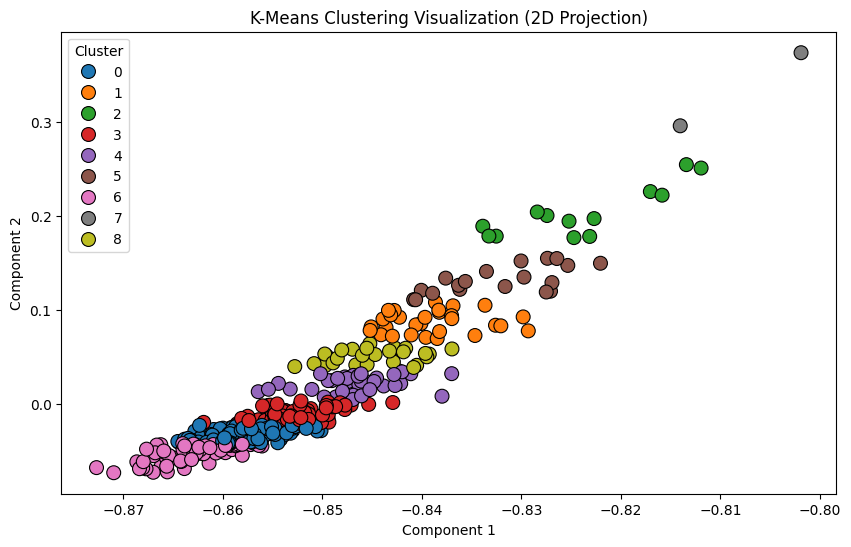

Finished displaying at: 2025-03-09 16:05:39 

Finished executing at: 2025-03-09 16:05:39 



In [655]:
best_combination, best_Sil, best_WSS = run_combinations(9, best_combination, best_Sil, best_WSS)

2025-03-09 16:05:39,963 : INFO : collecting all words and their counts
2025-03-09 16:05:39,966 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 16:05:39,971 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 16:05:39,983 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 16:05:39,986 : INFO : Creating a fresh vocabulary
2025-03-09 16:05:39,992 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T16:05:39.991075', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 16:05:39,995 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Executed at: 2025-03-09 16:05:39 



2025-03-09 16:05:40,251 : INFO : EPOCH 0: training on 24723 raw words (4622 effective words) took 0.1s, 54016 effective words/s
2025-03-09 16:05:40,385 : INFO : EPOCH 1: training on 24723 raw words (4636 effective words) took 0.1s, 55037 effective words/s
2025-03-09 16:05:40,464 : INFO : EPOCH 2: training on 24723 raw words (4707 effective words) took 0.1s, 87885 effective words/s
2025-03-09 16:05:40,544 : INFO : EPOCH 3: training on 24723 raw words (4673 effective words) took 0.0s, 132383 effective words/s
2025-03-09 16:05:40,598 : INFO : EPOCH 4: training on 24723 raw words (4653 effective words) took 0.0s, 111388 effective words/s
2025-03-09 16:05:40,655 : INFO : EPOCH 5: training on 24723 raw words (4691 effective words) took 0.0s, 105116 effective words/s
2025-03-09 16:05:40,706 : INFO : EPOCH 6: training on 24723 raw words (4690 effective words) took 0.0s, 123855 effective words/s
2025-03-09 16:05:40,758 : INFO : EPOCH 7: training on 24723 raw words (4643 effective words) took 0.

sg=1, Vector_Size=300, Window=3, Epoch=50
Finished displaying at: 2025-03-09 16:05:43 

Executing 13 start time: 2025-03-09 16:05:43
K=13: Silhouette Score and WSS=0.0994	1.5356

Cluster 0:
- JUI-F chief stands with journalists against PECA law
- Trump launches ‘reciprocal tariffs’ for allies, rivals
- Justice Sarfraz Dogar takes oath as acting Chief Justice of IHC
- Justice Jahangiri declares writing advocate on vehicles' number plates illegal
- Two soldiers hurt in Indian firing at LoC

Cluster 1:
- From Napa to Rada: Actor Hani Taha’s journey to the world’s premier drama school
- Chamber president, Customs men kidnapped in South Waziristan
- PGF’s ‘train the trainers program’ boosts golf coaching in Pakistan
- Pakistan hopes hosting major cricket tournament will erase worries of instability
- Hamas vows to uphold truce, plans to proceed with hostage-prisoner swap

Cluster 2:
- Gazans return to ruined homes and severe water shortage
- HBL and S&P launch Pakistan’s first Purchasing Ma

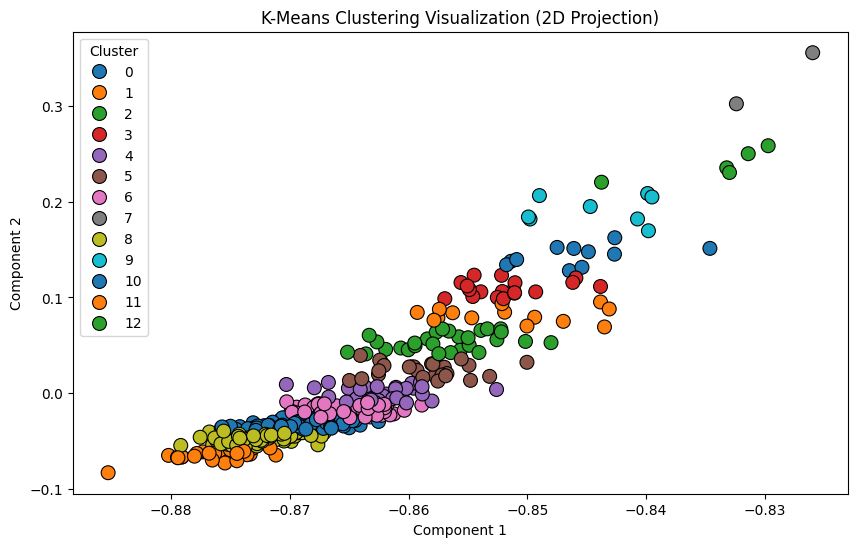

2025-03-09 16:05:44,406 : INFO : collecting all words and their counts
2025-03-09 16:05:44,409 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 16:05:44,411 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 16:05:44,422 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 16:05:44,425 : INFO : Creating a fresh vocabulary
2025-03-09 16:05:44,429 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T16:05:44.429257', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 16:05:44,432 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 16:05:44 

Finished executing at: 2025-03-09 16:05:44 

Executed at: 2025-03-09 16:05:44 



2025-03-09 16:05:44,607 : INFO : EPOCH 2: training on 24723 raw words (4664 effective words) took 0.0s, 119398 effective words/s
2025-03-09 16:05:44,665 : INFO : EPOCH 3: training on 24723 raw words (4727 effective words) took 0.0s, 113203 effective words/s
2025-03-09 16:05:44,725 : INFO : EPOCH 4: training on 24723 raw words (4785 effective words) took 0.0s, 98661 effective words/s
2025-03-09 16:05:44,776 : INFO : EPOCH 5: training on 24723 raw words (4734 effective words) took 0.0s, 139750 effective words/s
2025-03-09 16:05:44,829 : INFO : EPOCH 6: training on 24723 raw words (4726 effective words) took 0.0s, 117486 effective words/s
2025-03-09 16:05:44,885 : INFO : EPOCH 7: training on 24723 raw words (4608 effective words) took 0.0s, 103604 effective words/s
2025-03-09 16:05:44,940 : INFO : EPOCH 8: training on 24723 raw words (4712 effective words) took 0.0s, 114078 effective words/s
2025-03-09 16:05:44,995 : INFO : EPOCH 9: training on 24723 raw words (4664 effective words) took 

sg=1, Vector_Size=325, Window=3, Epoch=50
Finished displaying at: 2025-03-09 16:05:47 

Executing 13 start time: 2025-03-09 16:05:47
K=13: Silhouette Score and WSS=0.0974	1.5484

Cluster 0:
- ‘Like a wormhole’: Musk promises ‘Dubai Loop’ tunnel network
- Injuries disrupted England’s training during India ODI series: McCullum
- House Democrats urge Trump to retract comments on Gaza
- Economist Stiglitz urges tariffs on Trump’s ‘dysfunctional’ admin
- KU VC Prof Dr Khalid Iraqi inaugurates second agricultural festival

Cluster 1:
- Trump launches ‘reciprocal tariffs’ for allies, rivals
- DS Polo storm into Deepal 96 Punjab Cup final
- May 9 crossed all limits, says CB judge
- Facebook demands confirmation from page operators on content for children under 13
- Canada vs Sweden 4-3: Marner’s OT winner lifts Canada in thriller

Cluster 2:
- Explosion near security convoy in Bannu injures two personnel
- China’s Tencent wins video copyright infringment case in US district court
- Petrol pric

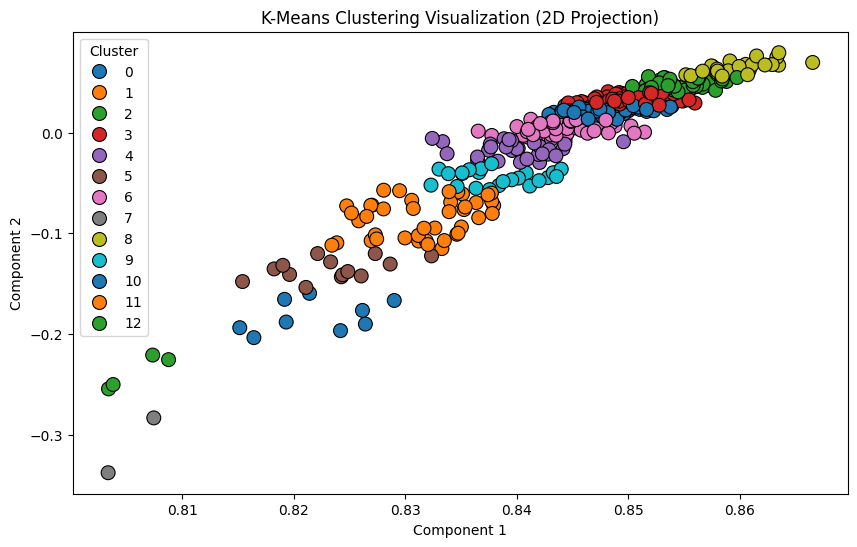

2025-03-09 16:05:48,668 : INFO : collecting all words and their counts
2025-03-09 16:05:48,671 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 16:05:48,674 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 16:05:48,686 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 16:05:48,691 : INFO : Creating a fresh vocabulary
2025-03-09 16:05:48,696 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T16:05:48.695219', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 16:05:48,698 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 16:05:48 

Finished executing at: 2025-03-09 16:05:48 

Executed at: 2025-03-09 16:05:48 



2025-03-09 16:05:48,875 : INFO : EPOCH 1: training on 24723 raw words (4679 effective words) took 0.1s, 87943 effective words/s
2025-03-09 16:05:48,953 : INFO : EPOCH 2: training on 24723 raw words (4748 effective words) took 0.1s, 82332 effective words/s
2025-03-09 16:05:49,011 : INFO : EPOCH 3: training on 24723 raw words (4572 effective words) took 0.0s, 106150 effective words/s
2025-03-09 16:05:49,072 : INFO : EPOCH 4: training on 24723 raw words (4590 effective words) took 0.0s, 97380 effective words/s
2025-03-09 16:05:49,142 : INFO : EPOCH 5: training on 24723 raw words (4685 effective words) took 0.1s, 86232 effective words/s
2025-03-09 16:05:49,210 : INFO : EPOCH 6: training on 24723 raw words (4691 effective words) took 0.1s, 90864 effective words/s
2025-03-09 16:05:49,278 : INFO : EPOCH 7: training on 24723 raw words (4566 effective words) took 0.1s, 86860 effective words/s
2025-03-09 16:05:49,342 : INFO : EPOCH 8: training on 24723 raw words (4612 effective words) took 0.0s,

sg=1, Vector_Size=350, Window=3, Epoch=50
Finished displaying at: 2025-03-09 16:05:52 

Executing 13 start time: 2025-03-09 16:05:52
K=13: Silhouette Score and WSS=0.0880	1.5841

Cluster 0:
- Jeffrey Sachs: Trump's tariff policy bound to fail
- Everyone can’t go to jail to meet Imran: IHC CJ
- Justice Sarfraz Dogar sworn in as acting chief justice of IHC
- House Democrats urge Trump to retract comments on Gaza
- Harsher penalties for forced begging in Punjab

Cluster 1:
- Gazans return to ruined homes and severe water shortage
- Mohsin Naqvi announces three-day spring festival in Islamabad
- Palestinian population 'must remain in its land’: Vatican
- Workshop stresses for shaping equitable, sustainable food systems
- Turkiye’s President Erdogan wraps up two-day visit to Pakistan

Cluster 2:
- IMF’s 2024 Article IV report, and debate on inflation—I
- Stocks remain range-bound, KSE-100 closes 361 points lower
- ICC announces prize money for 2025 Champions Trophy
- Champions Trophy 2025: 

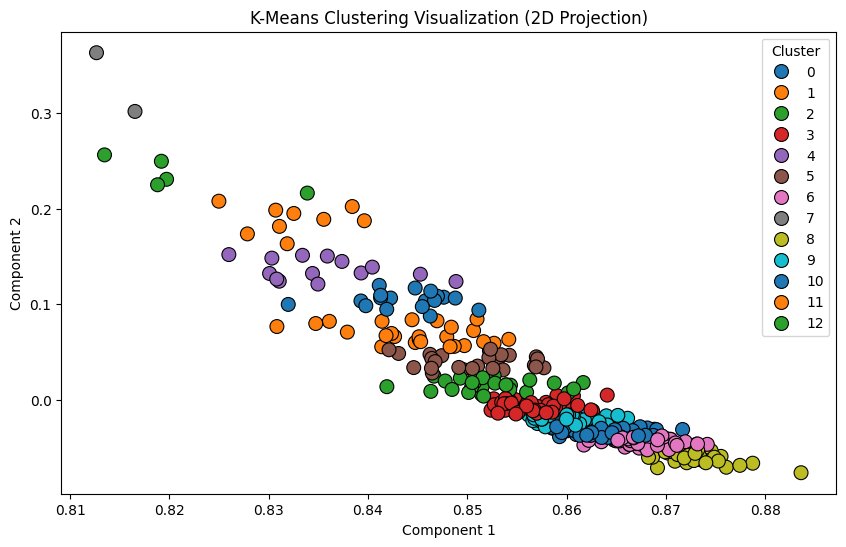

2025-03-09 16:05:53,136 : INFO : collecting all words and their counts
2025-03-09 16:05:53,139 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 16:05:53,141 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 16:05:53,151 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 16:05:53,154 : INFO : Creating a fresh vocabulary
2025-03-09 16:05:53,158 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T16:05:53.158210', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 16:05:53,161 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 16:05:53 

Finished executing at: 2025-03-09 16:05:53 

Executed at: 2025-03-09 16:05:53 



2025-03-09 16:05:53,313 : INFO : EPOCH 1: training on 24723 raw words (4679 effective words) took 0.1s, 89752 effective words/s
2025-03-09 16:05:53,408 : INFO : EPOCH 2: training on 24723 raw words (4748 effective words) took 0.1s, 60497 effective words/s
2025-03-09 16:05:53,528 : INFO : EPOCH 3: training on 24723 raw words (4632 effective words) took 0.1s, 75382 effective words/s
2025-03-09 16:05:53,624 : INFO : EPOCH 4: training on 24723 raw words (4605 effective words) took 0.1s, 69958 effective words/s
2025-03-09 16:05:53,705 : INFO : EPOCH 5: training on 24723 raw words (4617 effective words) took 0.1s, 66272 effective words/s
2025-03-09 16:05:53,760 : INFO : EPOCH 6: training on 24723 raw words (4619 effective words) took 0.0s, 115936 effective words/s
2025-03-09 16:05:53,817 : INFO : EPOCH 7: training on 24723 raw words (4609 effective words) took 0.0s, 104143 effective words/s
2025-03-09 16:05:53,865 : INFO : EPOCH 8: training on 24723 raw words (4571 effective words) took 0.0s

sg=1, Vector_Size=400, Window=3, Epoch=50
Finished displaying at: 2025-03-09 16:05:56 

Executing 13 start time: 2025-03-09 16:05:56
K=13: Silhouette Score and WSS=0.0986	1.4367

Cluster 0:
- ‘Is this the same team?’: Cricket fans rejoice as Pakistan clinches record-breaking victory against South Africa
- Aurangzeb discusses Pakistan’s structural reforms with IFC chief
- Injuries disrupted England’s training during India ODI series: McCullum
- Justice Mansoor Ali Shah dismisses reference fears, highlights judiciary’s performance
- South African rand firms after Trump’s tariff move; local budget next week

Cluster 1:
- Playgrounds come alive again with Brazil school phone ban
- JD Vance says US wields economic, military leverage on Russia in Ukraine talks
- Senate body vows to continue probing solar panel import scandal
- In a first, new SC judges to take oath outdoors
- Alligators, raccoons, and more thrive in urban sewer systems

Cluster 2:
- This Valentine's Day, say yes to socks and

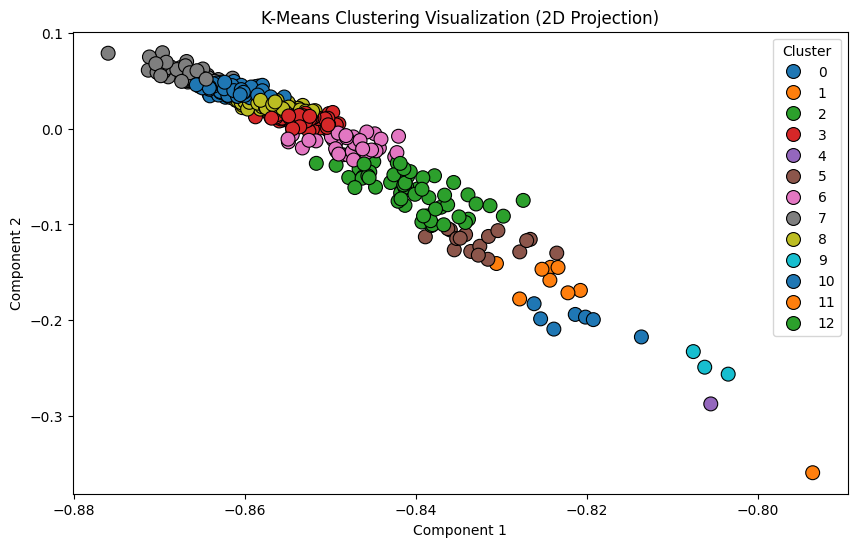

Finished displaying at: 2025-03-09 16:05:56 

Finished executing at: 2025-03-09 16:05:56 



In [656]:
best_combination, best_Sil, best_WSS = run_combinations(13, best_combination, best_Sil, best_WSS)

In [657]:
# Convert to DataFrame for easy export
results_df = pd.DataFrame(results, columns=['k', 'Vectorizer Type', 'vector_size', 'window', 'Epochs Count', 'Vectorizer Name', 'Silhouette Score', 'WSS Score'])

# Save results
results_df.to_csv("clustering_results.csv", index=False)

# Open the file automatically
os.startfile("clustering_results.csv")

results_df

,k,Vectorizer Type,vector_size,window,Epochs Count,Vectorizer Name,Silhouette Score,WSS Score
0,5,Word2Vec,300,3,50,Skipgram,0.106843,2.048837
1,5,Word2Vec,325,3,50,Skipgram,0.110956,2.029696
2,5,Word2Vec,350,3,50,Skipgram,0.130027,1.910383
3,5,Word2Vec,400,3,50,Skipgram,0.102759,1.874756
4,9,Word2Vec,300,3,50,Skipgram,0.111639,1.699098
5,9,Word2Vec,325,3,50,Skipgram,0.094028,1.739962
6,9,Word2Vec,350,3,50,Skipgram,0.082904,1.710299
7,9,Word2Vec,400,3,50,Skipgram,0.093138,1.729730
8,13,Word2Vec,300,3,50,Skipgram,0.099381,1.535625
9,13,Word2Vec,325,3,50,Skipgram,0.097386,1.548404


In [658]:
# Convert to DataFrame for easy export
wss_scores_df = pd.DataFrame(wss_scores, columns=['k', 'Average WSS Score'])

wss_scores_df

,k,Average WSS Score
0,5,1.965918
1,9,1.719772
2,13,1.526207


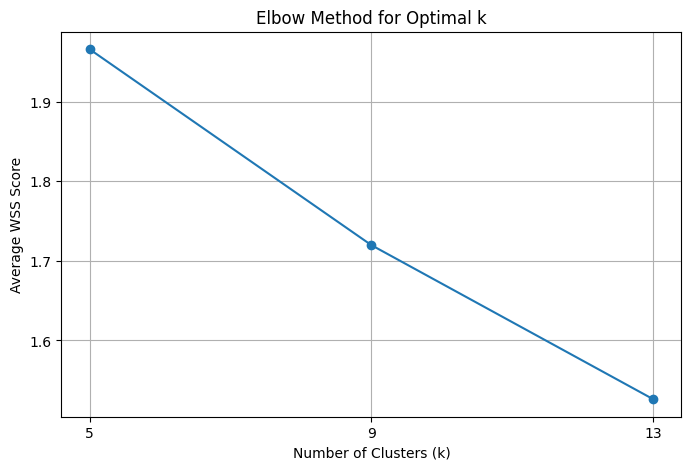

In [659]:
# Plot the elbow plot
plt.figure(figsize=(8, 5))
plt.plot(wss_scores_df['k'], wss_scores_df['Average WSS Score'], marker='o', linestyle='-')

# Add labels and title
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Average WSS Score")
plt.title("Elbow Method for Optimal k")
plt.xticks(wss_scores_df['k'])  # Ensure all k values are shown on x-axis
plt.grid(True)

# Show the plot
plt.show()

In [660]:
best_combination # vector size, window size, epoch

[13, 'word', 'Skipgram', 400, 3, 50, 0.09856355, 1.4366717338562012]